### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading Dataset & Candidate Image

In [ ]:
import cv2 as cv

# dataset = cv.imread("/content/drive/MyDrive/Dataset/Dataset_PRL/Numbers_Template.png")
# candidate = cv.imread("/content/drive/MyDrive/Dataset/Dataset_PRL/Numbers_9.png")
dataset = cv.imread("/content/drive/MyDrive/Dataset/Dataset_PRL/Vowels_Template.png")
candidate = cv.imread("/content/drive/MyDrive/Dataset/Dataset_PRL/Vowels_9.png")

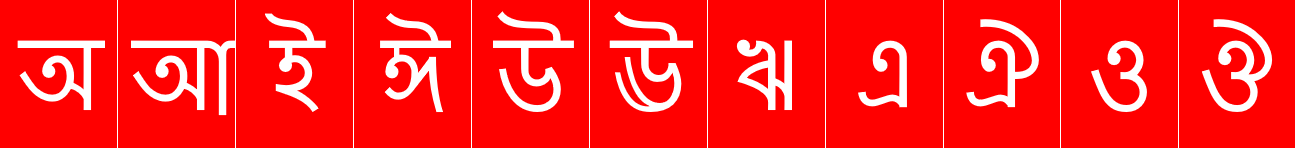

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(dataset)

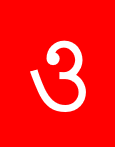

In [ ]:
cv2_imshow(candidate)

In [ ]:
print(dataset.shape)
print(candidate.shape)

(148, 1295, 3)
(147, 115, 3)


### Defining Size of Dataset

In [ ]:
n = 11;

### Defining Height & Weight of Images

In [ ]:
m = 50
dataset_height = m
candidate_height = dataset_height
dataset_weight = n * m
candidate_weight = m

### Resizing Images


In [ ]:
candidate_rs = cv.resize(candidate, dsize=(candidate_weight, candidate_height))
dataset_rs = cv.resize(dataset, dsize=(dataset_weight, dataset_height))

In [ ]:
print(dataset_rs.shape)
print(candidate_rs.shape)

(50, 550, 3)
(50, 50, 3)


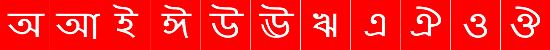

In [ ]:
cv2_imshow(dataset_rs)

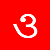

In [ ]:
cv2_imshow(candidate_rs)

### Converting RGB Images to Grayscale

In [ ]:
dataset_gray = cv.cvtColor(dataset_rs, cv.COLOR_BGR2GRAY)
candidate_gray = cv.cvtColor(candidate_rs, cv.COLOR_BGR2GRAY)

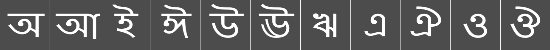

In [ ]:
cv2_imshow(dataset_gray)

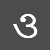

In [ ]:
cv2_imshow(candidate_gray)

In [ ]:
print(dataset_gray.shape)
print(candidate_gray.shape)

(50, 550)
(50, 50)


### Computing a Global Threshold Value from Grayscale Image(Using Otsu's Method) & Converting to Binary Image


In [ ]:
ret2, dataset_threshold = cv.threshold(
    dataset_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU
)
ret1, candidate_threshold = cv.threshold(
    candidate_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU
)

In [ ]:
dataset_bw = dataset_threshold
candidate_bw = candidate_threshold

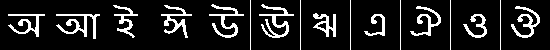

In [ ]:
cv2_imshow(dataset_bw)


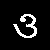

In [ ]:
cv2_imshow(candidate_bw)

### Computing Correlation Coefficient between Candidate & Each Image of Dataset


In [ ]:
j = 0
all_cc = []
for i in range(0, n):
    Image = dataset_bw[
        0:candidate_height, j : j + candidate_weight
    ]  # Cropping image one by one from dataset for template matching
    # cv2_imshow(Image)
    cc = cv.matchTemplate(
        candidate_bw, Image, cv.TM_CCORR_NORMED
    )  # Computing the correlation coefficient
    print(cc[0][0])
    all_cc.append(cc[0][0])
    j = j + 50;

0.2744816
0.31707343
0.3069747
0.41128367
0.49222508
0.37082544
0.3665083
0.47586837
0.16534793
0.8458994
0.31579843


In [ ]:
print(all_cc)

[0.2744816, 0.31707343, 0.3069747, 0.41128367, 0.49222508, 0.37082544, 0.3665083, 0.47586837, 0.16534793, 0.8458994, 0.31579843]


### Checking for the Value and Index of the Highest Correlation Coefficient

In [ ]:
value = max(all_cc)
index = all_cc.index(value)
print("Candidate Image Best Matched with ", index, " ( ", value, " )")

Candidate Image Best Matched with  9  (  0.8458994  )


### Drawing a Boundary Box on the Dataset for Matched Candidate

Matched Template with Boundary Box:


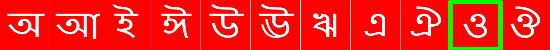

In [ ]:
dataset_marked = cv.rectangle(dataset_rs, (index * candidate_weight, 1), (index * candidate_weight + 50, 49), (0, 255, 0), 3)
print("Matched Template with Boundary Box:")
cv2_imshow(dataset_marked)